In [1]:
# Modules
import ipywidgets as widgets
from ipywidgets import interact_manual
from IPython.display import display
import matplotlib.pyplot as plt

import os, shutil

# needed to use matplotlib with jupyter widgets
%matplotlib notebook

# Filtering data using Jupyter Widgets
## Buttons
 - **Original**: moves images of real people to the `original folder`
 - **Fake**: moves images of fake people to the `fake folder`
 - **Delete**: *deletes* images that doesn't have people in it or irrelevant
 - **Later**: moves images that have **a collage of fake and real images** to a `later folder` to be **processed later**
 - **Skip**: skips the current image and plots the next one

## Widget Layout
![](imgs/widget.png)

Files:748


<IPython.core.display.Javascript object>


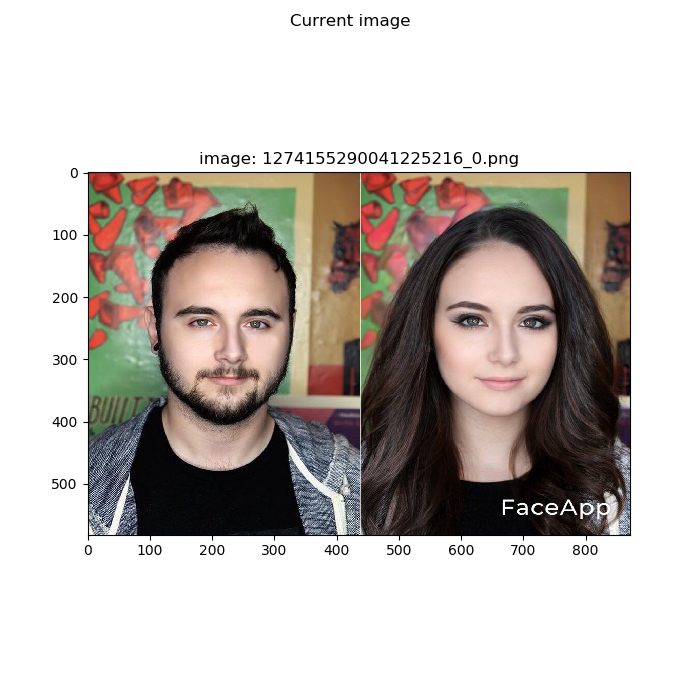

In [2]:
# get the file names
src_folder = 'scrapped_data'
dst_folder = 'data'

files = os.listdir(src_folder)
print(f"Files:{len(files)}")

# Setting the first and last indexs
i=0 # starting index
i_max = len(files) # ending index

# Plot the first picture
img = plt.imread(f'{src_folder}/{files[i]}')
fig, ax = plt.subplots(1, figsize=(7, 7))
ax = plt.imshow(img)
plt.suptitle("Current image")
plt.show()

# Create the widgets
original = widgets.Button(description='Original')
fake = widgets.Button(description='Fake')
delete = widgets.Button(description='Delete')
later = widgets.Button(description='Later')
skip = widgets.Button(description='skip')
out = widgets.Output()

# plots the next image
def plot_next(*args):
    global i
    i += 1
    # stop
    if i >= i_max: 
        print("Done")
        return
    
    # get next image index
    img = plt.imread(f'{src_folder}/{files[i]}')
    ax.set_data(img)
    plt.show()
    plt.title(f"image: {files[i]}")

# moves image at the current index to the given destination 
def move_image(destination):
    shutil.copy2(f'{src_folder}/{files[i]}', os.path.join(destination, files[i]))

# original button callback    
def original_onclick(_):
    with out:
        # copy the image to original folder
        move_image("original")
        
        # plot the next image
        plot_next()

# fake button callback        
def fake_onclick(_):
    with out:
        # copy the image to the fake folder
        move_image("fake")
        
        # plot the next image
        plot_next()
        
# delete button callback
def delete_onclick(_):
    with out:
        # delete the image
        os.remove(f"{src_folder}/{files[i]}")
        
        # plot the next image
        plot_next()

# later button callback        
def later_onclick(_):
    with out:
        # copy the image to the later folder
        move_image("later")
    
        # plot the next image
        plot_next()

# attaching the buttons with their callback functions         
original.on_click(original_onclick)
fake.on_click(fake_onclick)
delete.on_click(delete_onclick)
later.on_click(later_onclick)
skip.on_click(plot_next)

# showing the widgets
widgets.VBox([original, fake, delete, later, skip, out])